In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib

# Cell 1: Load the dataset
file_path = r"C:\\Users\\Haripriya.R\\Desktop\\studies\\SmartWindDashboard\\data\\cleaned_weather_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


       STATION        DATE   LATITUDE  LONGITUDE  ELEVATION  \
0  43279099999  2003-01-01  12.994414  80.180517      15.84   
1  43279099999  2003-01-02  12.994414  80.180517      15.84   
2  43279099999  2003-01-03  12.994414  80.180517      15.84   
3  43279099999  2003-01-04  12.994414  80.180517      15.84   
4  43279099999  2003-01-05  12.994414  80.180517      15.84   

                        NAME  TEMP  TEMP_ATTRIBUTES  DEWP  DEWP_ATTRIBUTES  \
0  CHENNAI INTERNATIONAL, IN  78.0               11  68.7               11   
1  CHENNAI INTERNATIONAL, IN  77.8               11  68.7               11   
2  CHENNAI INTERNATIONAL, IN  79.1               11  69.2               11   
3  CHENNAI INTERNATIONAL, IN  78.6                9  67.9                9   
4  CHENNAI INTERNATIONAL, IN  79.0               10  68.4               10   

   ...   MAX  MAX_ATTRIBUTES   MIN  MIN_ATTRIBUTES  PRCP  PRCP_ATTRIBUTES  \
0  ...  88.2                  68.0                   0.0                D  

In [4]:
# Cell 2: Select required features and target
df['Wind_Range'] = df['MXSPD'] - df['WDSP']
df = df[['MXSPD', 'Wind_Range', 'TEMP', 'GUST', 'PRCP', 'VISIB', 'Humidity', 'WDSP']]

# Check for missing values and fill them with median
df = df.fillna(df.median())
print("Dataset after selecting features and handling missing values:")
print(df.info())

Dataset after selecting features and handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MXSPD       7666 non-null   float64
 1   Wind_Range  7666 non-null   float64
 2   TEMP        7666 non-null   float64
 3   GUST        7666 non-null   float64
 4   PRCP        7666 non-null   float64
 5   VISIB       7666 non-null   float64
 6   Humidity    7666 non-null   float64
 7   WDSP        7666 non-null   float64
dtypes: float64(8)
memory usage: 479.3 KB
None


In [5]:
# Cell 3: Define the target variable and features
target = 'WDSP'  # Wind speed prediction
features = df.drop(columns=[target])

X = features
y = df[target]

In [6]:
# Cell 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (6132, 7)
Testing data shape: (1534, 7)


In [7]:
# Cell 5: Train XGBoost model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predict on test data
y_pred = xgb.predict(X_test)


In [8]:
# Cell 6: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.028281465089992994
R2 Score: 0.993272912702236


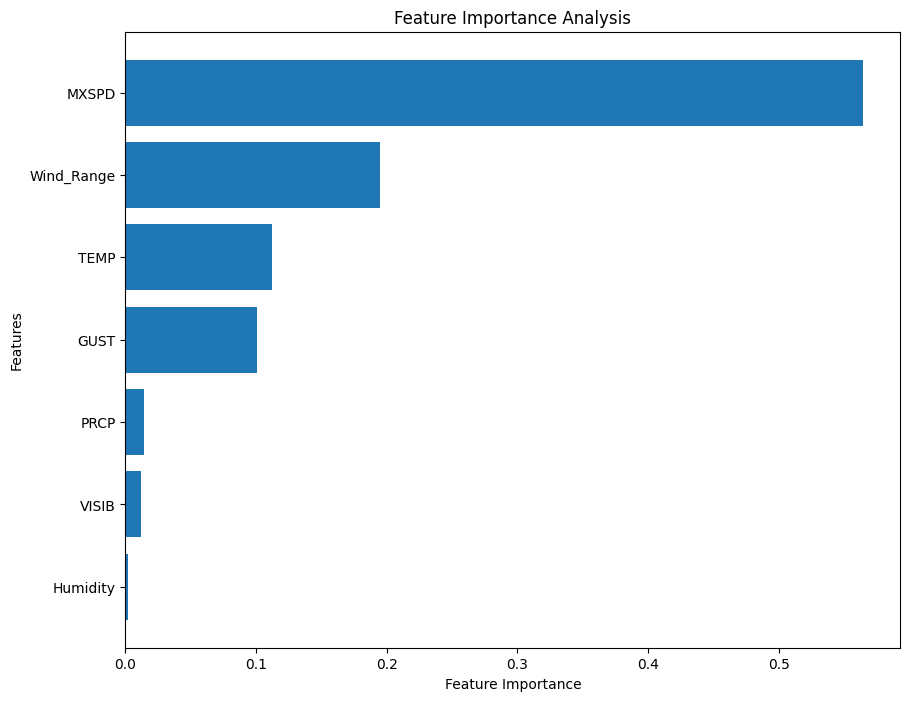

In [10]:
# Cell 7: Plot feature importance
importances = xgb.feature_importances_
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 8))
plt.barh(np.array(features.columns)[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()